<a href="https://colab.research.google.com/github/batul-hussain/ola_case_study/blob/main/OLA_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement** : Predict whether a driver will be leaving the company or not based on their attributes like

*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)


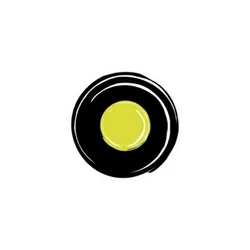

# **UNDERSTANDING THE DATA**
1. Importing Data using the pandas Library
2. Understanding the structure of Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as datetime

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/scaler case study/OLA Case Study/ola_driver_scaler.csv")

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe(include="all")

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,NaN,01/01/19,NaN,NaN,NaN,C20,NaN,NaN,23/07/15,29/07/20,NaN,NaN,NaN,NaN
freq,NaN,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
mean,9551.500000,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,NaN,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,NaN,NaN,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,NaN,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,NaN,NaN,2.000000,3.000000,6.997000e+05,3.000000


In [ ]:
columns = df.columns.tolist()
for column in columns :
  print(column,':',df[column].nunique())

Unnamed: 0 : 19104
MMM-YY : 24
Driver_ID : 2381
Age : 36
Gender : 2
City : 29
Education_Level : 3
Income : 2383
Dateofjoining : 869
LastWorkingDate : 493
Joining Designation : 5
Grade : 5
Total Business Value : 10181
Quarterly Rating : 4


In [ ]:
columns = df.columns.tolist()
for column in columns :
  print(column,':')
  print(df[column].value_counts().nlargest(5))
  print("--------------------------------------")

Unnamed: 0 :
0        1
12741    1
12739    1
12738    1
12737    1
Name: Unnamed: 0, dtype: int64
--------------------------------------
MMM-YY :
01/01/19    1022
02/01/19     944
03/01/19     870
12/01/20     819
10/01/20     818
Name: MMM-YY, dtype: int64
--------------------------------------
Driver_ID :
2110    24
2617    24
1623    24
1642    24
1644    24
Name: Driver_ID, dtype: int64
--------------------------------------
Age :
36.0    1283
33.0    1250
34.0    1234
30.0    1146
32.0    1143
Name: Age, dtype: int64
--------------------------------------
Gender :
0.0    11074
1.0     7978
Name: Gender, dtype: int64
--------------------------------------
City :
C20    1008
C29     900
C26     869
C22     809
C27     786
Name: City, dtype: int64
--------------------------------------
Education_Level :
1    6864
2    6327
0    5913
Name: Education_Level, dtype: int64
--------------------------------------
Income :
48747     57
109652    32
68356     30
42260     28
67490     28
Nam

In [ ]:
#USING PLOTLY TO INCREASE INTERACTIVITY OF GRAPHS
px.box(df, x="Income",height=200,width=600)

In [ ]:
px.box(df,x="Total Business Value",height=200,width=600)

In [ ]:
px.box(df,x="Age",height=200,width=600)

<AxesSubplot:xlabel='Total Business Value', ylabel='Count'>

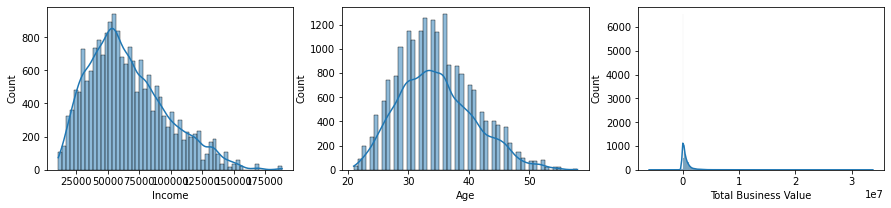

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
sns.histplot(df['Income'],kde =True,ax=axis[0])
sns.histplot(df['Age'],kde = True,ax=axis[1])
sns.histplot(df['Total Business Value'],kde = True,ax=axis[2])


<AxesSubplot:xlabel='Quarterly Rating', ylabel='count'>

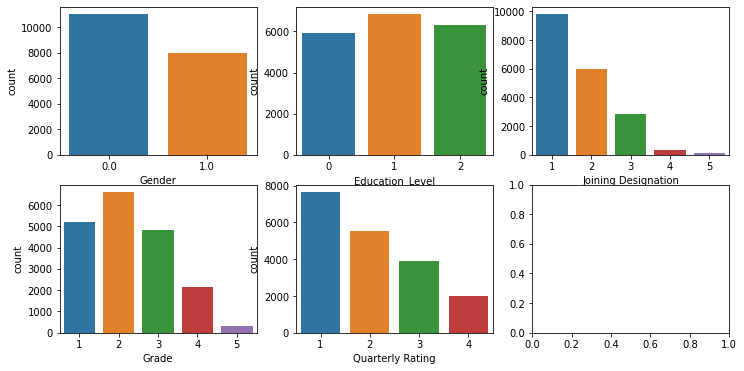

In [ ]:
fig,axis = plt.subplots(nrows = 2,ncols = 3,figsize = (12,6))
sns.countplot(x =df['Gender'],ax=axis[0,0])
sns.countplot(x = df['Education_Level'],ax=axis[0,1])
sns.countplot(x = df['Joining Designation'],ax=axis[0,2])
sns.countplot(x =df['Grade'],ax=axis[1,0])
sns.countplot(x=df['Quarterly Rating'],ax=axis[1,1])

<AxesSubplot:xlabel='Gender', ylabel='Total Business Value'>

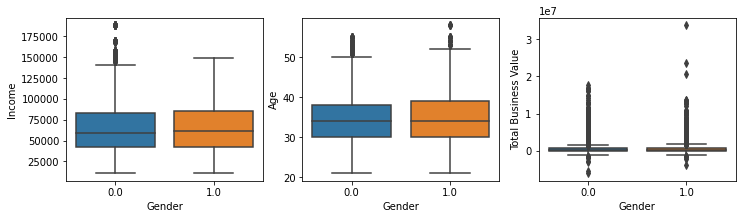

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (12,3))
sns.boxplot(y = df['Income'],x = df["Gender"],ax=axis[0])
sns.boxplot(y = df['Age'],x = df["Gender"],ax=axis[1])
sns.boxplot(y = df['Total Business Value'],x = df["Gender"],ax=axis[2])


<AxesSubplot:xlabel='Education_Level', ylabel='Total Business Value'>

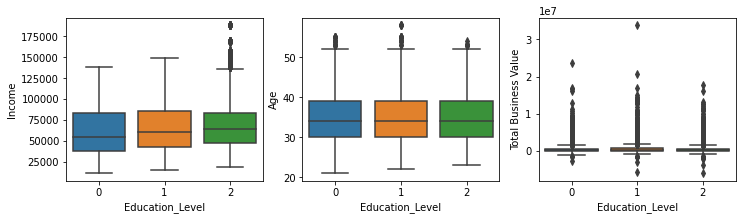

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (12,3))
sns.boxplot(y = df['Income'],x = df["Education_Level"],ax=axis[0])
sns.boxplot(y = df['Age'],x = df["Education_Level"],ax=axis[1])
sns.boxplot(y = df['Total Business Value'],x = df["Education_Level"],ax=axis[2])

<AxesSubplot:xlabel='Joining Designation', ylabel='Total Business Value'>

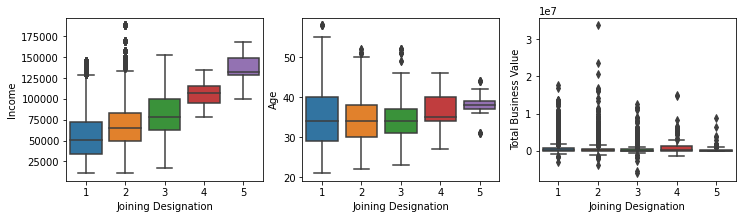

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (12,3))
sns.boxplot(y = df['Income'],x = df["Joining Designation"],ax=axis[0])
sns.boxplot(y = df['Age'],x = df["Joining Designation"],ax=axis[1])
sns.boxplot(y = df['Total Business Value'],x = df["Joining Designation"],ax=axis[2])

<AxesSubplot:xlabel='Grade', ylabel='Total Business Value'>

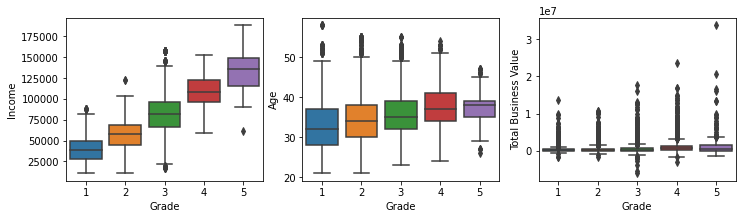

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (12,3))
sns.boxplot(y = df['Income'],x = df["Grade"],ax=axis[0])
sns.boxplot(y = df['Age'],x = df["Grade"],ax=axis[1])
sns.boxplot(y = df['Total Business Value'],x = df["Grade"],ax=axis[2])

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Total Business Value'>

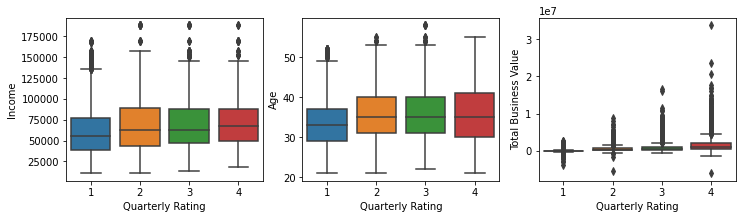

In [ ]:
fig,axis = plt.subplots(nrows = 1,ncols = 3,figsize = (12,3))
sns.boxplot(y = df['Income'],x = df["Quarterly Rating"],ax=axis[0])
sns.boxplot(y = df['Age'],x = df["Quarterly Rating"],ax=axis[1])
sns.boxplot(y = df['Total Business Value'],x = df["Quarterly Rating"],ax=axis[2])

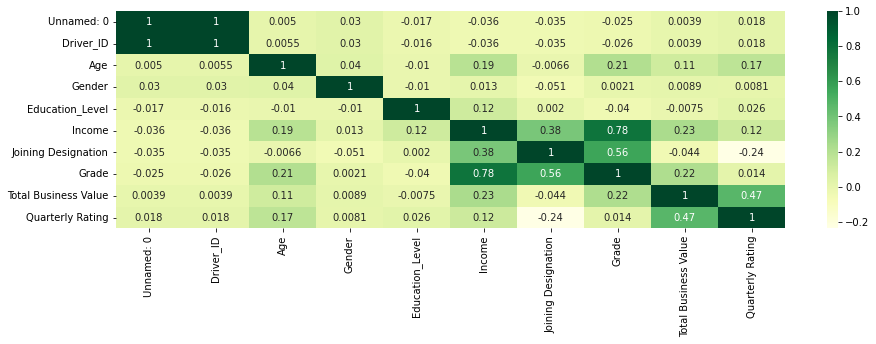

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
sns.heatmap(df.corr(),cmap="YlGn",annot = True )
plt.show()


# **INSIGHTS BASED ON EDA**

*Income:*
- 50% of the drivers income lies in between 42.38 k - 84 k 
- Income value follows right skewed normal distribution
- These is correlation of 0.78 between grade and income 

*Total Business Value :*
- 50% of the drivers have business value in between 1.23 M -1.75 M

*Age :*
- 50% of the drivers are in the range of 30 - 40 yrs
- Age Follows normal distribution
- Drivers in there early 30's have grade 1 and drivers in there late 30s have grade 5

*Gender :*
- There are more male drivers than female drivers in ola
- Median of Income, Age and Total business Value of both male and Female are in the same range 
- Both male and female have similar median for Income hence there is no differenciation on male and female in the company 

*Education Level :*
- Most of the drivers are 12+ followed by graduates
- Median of Income is higher for graduates followed by 12+ and 10+

*Joining Designation :*
- Most of the drivers join as beginners (Designation : 1)
- Income range is highest for drivers joining as designation 5 
- Drivers in there near 40s have designation 5

*Grade :*
- Most popular grades are 2 followed by 1 and 3.
- Drivers with grade 5 have income above 100000
- Drivers with grade 1 have income in the range 25000-50000
- These is correlation of 0.78 between grade and income 


*Quaterly Rating :*
- Most of the drivers have quaterly rating as 1, followed by 2 and 3
- Quaterly Rating have no major impact on income range 

# **DATA PRE-PROCESSING**

**FEATURE ENGINEERING**

In [ ]:
#drop unnamed column
df.drop(columns=["Unnamed: 0"],inplace=True)


In [ ]:
#Convert object to date time data type 
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
#DUPLICATE VALUE CHECK
df.duplicated().value_counts()

False    19104
dtype: int64

In [ ]:
# #outlier treatment
df_float_columns = ['Age','Income','Total Business Value']
for column in df_float_columns:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3 - q1
  df = df[(df[column]>(q1-1.5*IQR) ) & (df[column]<(q3+1.5*IQR))]


In [ ]:
#creating Total Working Days Column
df["total_working_days"] = df["LastWorkingDate"] - df["Dateofjoining"]
df['total_working_days'] = df['total_working_days'].fillna(pd.Timedelta(seconds=0))


In [ ]:
#Creating Target Column
df["Target"] = 0
mask = df["total_working_days"] > datetime.timedelta(days = 0)
df.loc[mask, "Target"] = 1

In [ ]:
#Creating Income Increased Column
a = df.groupby("Driver_ID")["Income"].last() - df.groupby("Driver_ID")["Income"].first()
df2 = pd.merge(df,a,left_on = "Driver_ID",right_on = "Driver_ID",how = "inner")

mask = df2["Income_y"] > 0
df2.loc[mask,"Income_y"] = 1

In [ ]:
#Creating Rating Increased Column
b = df2.groupby("Driver_ID")["Quarterly Rating"].last() - df.groupby("Driver_ID")["Quarterly Rating"].first()
df3 = pd.merge(df2,b,left_on = "Driver_ID",right_on = "Driver_ID",how = "inner")

In [ ]:
mask = df3["Quarterly Rating_y"] > 0
df3.loc[mask,"Quarterly Rating_y"] = 1

In [ ]:
#Total Business Value Column
c = df3.groupby("Driver_ID")["Total Business Value"].sum() 
df4 = pd.merge(df3,c,left_on = "Driver_ID",right_on = "Driver_ID",how = "inner") 

In [ ]:
#Now we have all the information needed via feature Engineering
#lets drop MMM-YY, Date of Joining, Last Working Date, Total Business Value_x and then lets select last row for each driver ID to retain all the information in one row
df4.drop(columns=["MMM-YY","Dateofjoining","LastWorkingDate","Total Business Value_x"],inplace=True)

In [ ]:
df5 = df4.groupby("Driver_ID",as_index=False).tail(1)

In [ ]:
df5.head()

,Driver_ID,Age,Gender,City,Education_Level,Income_x,Joining Designation,Grade,Quarterly Rating_x,total_working_days,Target,Income_y,Quarterly Rating_y,Total Business Value_y
1,1,28.0,0.0,C23,2,57387,1,1,2,77 days,1,0,0,-665480
3,2,31.0,0.0,C7,2,67016,2,2,1,0 days,0,0,0,0
8,4,43.0,0.0,C13,2,65603,2,2,1,142 days,1,0,0,350000
11,5,29.0,0.0,C9,0,46368,1,1,1,57 days,1,0,0,120360
16,6,31.0,1.0,C11,1,78728,3,3,2,0 days,0,0,1,1265000


**ENCODING**

In [ ]:
#Label Encoding
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
c = ["City","total_working_days"]
for column in c:
  df5[column]= label_encoder.fit_transform(df5[column])

<ipython-input-85-1b1573801263>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-85-1b1573801263>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#MISSING VALUES
columns = df5.columns
for column in columns :
  print("Missing Value % in",column,':')
  print((df5[column].isna().sum()/df5.shape[0])*100)
  print("--------------------------------------")

Missing Value % in Driver_ID :
0.0
--------------------------------------
Missing Value % in Age :
0.0
--------------------------------------
Missing Value % in Gender :
0.4222972972972973
--------------------------------------
Missing Value % in City :
0.0
--------------------------------------
Missing Value % in Education_Level :
0.0
--------------------------------------
Missing Value % in Income_x :
0.0
--------------------------------------
Missing Value % in Joining Designation :
0.0
--------------------------------------
Missing Value % in Grade :
0.0
--------------------------------------
Missing Value % in Quarterly Rating_x :
0.0
--------------------------------------
Missing Value % in total_working_days :
0.0
--------------------------------------
Missing Value % in Target :
0.0
--------------------------------------
Missing Value % in Income_y :
0.0
--------------------------------------
Missing Value % in Quarterly Rating_y :
0.0
--------------------------------------
Mis

**STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(df5)
scaled_data = model.transform(df5)
scaled_data = pd.DataFrame(scaled_data, columns=df5.columns.tolist())

**KNN IMPUTATION**

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 9)
df_imputed = pd.DataFrame(imputer.fit_transform(scaled_data),columns=scaled_data.columns)
df_imputed.isna().sum()

Driver_ID                 0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income_x                  0
Joining Designation       0
Grade                     0
Quarterly Rating_x        0
total_working_days        0
Target                    0
Income_y                  0
Quarterly Rating_y        0
Total Business Value_y    0
dtype: int64

In [ ]:
target = df_imputed["Target"].copy()
data = df_imputed.drop(["Target"],axis=1)
target = target.apply(lambda x: 1 if x > 0 else 0)

In [ ]:
target.value_counts()

1    1597
0     771
Name: Target, dtype: int64

**CLASS IMBALANCE TREATMENT**

The dataset is imbalanced

For this dataset we will use SMOTE oversampling technique to balance the data
and SMOTE is applied only to encoded training set

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1776, 13)
Number transactions y_train dataset:  (1776,)
Number transactions X_test dataset:  (592, 13)
Number transactions y_test dataset:  (592,)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE()    
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))


Resampled dataset shape Counter({0: 1198, 1: 1198})


# **MODEL BUILDING**

**BAGGING ALGORITHM**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate
tree_clf = DecisionTreeClassifier(random_state=7, max_depth = 4)
kfold = KFold(n_splits=5)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)
print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 100.0 Validation: 99.95824634655533
K-Fold Accuracy Std: Train: 0.0 Validation: 0.08350730688935215


In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)
clf.fit(X_train, y_train)
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.9994366197183098 Rank: 1
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.9994366197183098 Rank: 1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree_clf2 = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
kfold = KFold(n_splits=5)
cv_acc_results = cross_validate(tree_clf2, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 100.0 Validation: 99.95824634655533
K-Fold Accuracy Std: Train: 0.0 Validation: 0.08350730688935215


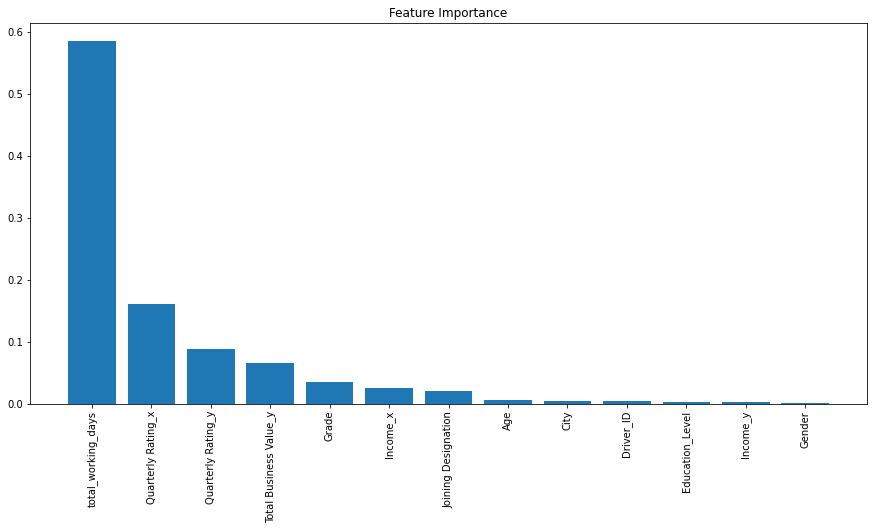

In [ ]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
model2 = clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

**BOOSTING ALGORITHM**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

model3 = GBC(n_estimators=150, learning_rate=0.3, max_depth=4, random_state=0, verbose = 1).fit(X_train, y_train)

print(f"Training accuracy:{model3.score(X_train, y_train)}\nTest Accuracy: {model3.score(X_test, y_test)}")

      Iter       Train Loss   Remaining Time 
         1           0.7549            0.33s
         2           0.5097            0.36s
         3           0.3569            0.44s
         4           0.2547            0.43s
         5           0.1839            0.42s
         6           0.1338            0.43s
         7           0.0979            0.42s
         8           0.0718            0.42s
         9           0.0528            0.42s
        10           0.0390            0.41s
        20           0.0019            0.34s
        30           0.0001            0.29s
        40           0.0000            0.27s
        50           0.0000            0.25s
        60           0.0000            0.21s
        70           0.0000            0.17s
        80           0.0000            0.14s
        90           0.0000            0.11s
       100           0.0000            0.09s
Training accuracy:1.0
Test Accuracy: 0.9983108108108109


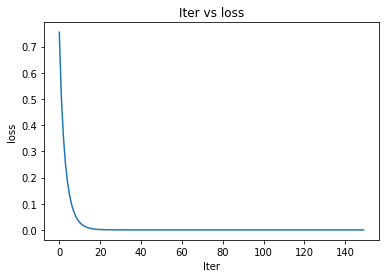

In [ ]:
#Plotting Loss
plt.plot(model3.train_score_)

plt.xlabel('Iter')
plt.ylabel('loss')
plt.title('Iter vs loss')
plt.show()

[1.02062078e-16 0.00000000e+00 0.00000000e+00 5.93143825e-15
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.45134967e-15]


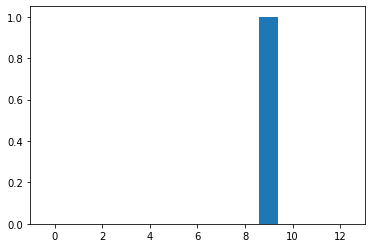

In [ ]:
print(model3.feature_importances_)

plt.bar(range(len(model3.feature_importances_)), model3.feature_importances_)
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20)
folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f503d6c0f90>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_class=20, num_parallel_tree=None,
                                           objective='multi:softmax', ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.1, 0.5, 0.8],
                                        'max_depth': [3, 4, 5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='accuracy', verbose=3)

In [ ]:
print(f"Training accuracy:{random_search.score(X_train, y_train)}\nTest Accuracy: {random_search.score(X_test, y_test)}")

Training accuracy:1.0
Test Accuracy: 1.0


# **Results Evaluation**

**Confusion Matrix for Bagging Algorithm**

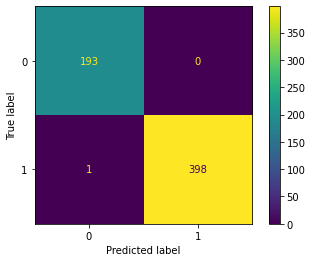

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred2 = model2.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array
ConfusionMatrixDisplay(conf_matrix).plot()

**F1 Score for Bagging Algorithm**

In [ ]:
from sklearn.metrics import f1_score
F1_Score=f1_score(y_test, y_pred2)
print(F1_Score)

0.9987452948557088


**Confusion Matrix for Boosting Algorithm**

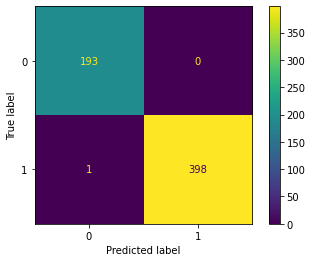

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred3 = model3.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix # 2D np array
ConfusionMatrixDisplay(conf_matrix).plot()

**F1 Score for Boosting Algorithm**

In [ ]:
from sklearn.metrics import f1_score
F1_Score=f1_score(y_test, y_pred3)
print(F1_Score)

0.9987452948557088


# **AU ROC (Area Under Reciever Operating Characterstic Curve)**
If we want to measure how well a model is performing, we use metric called AU - ROC i.e. Area Under ROC curve a.k.a AUC (Area under curve)

The curve for best model will pass through best model point (0,1) and it'll have an AUC of 1.

It does not work well for the highly imbalanced data set

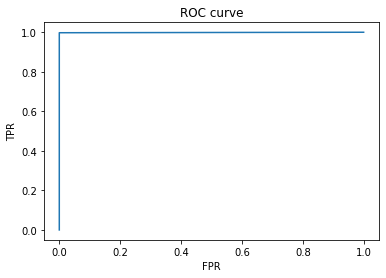

In [ ]:
#Curve for Bagging Algorithm
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_pred2)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

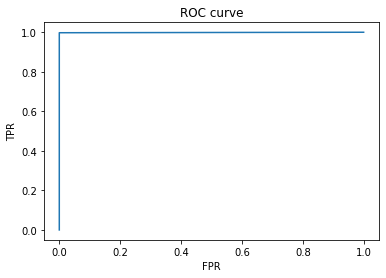

In [ ]:
#Curve for Boosting Algorithm
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_pred3)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# **INSIGHTS AND RECOMMENDATIONS**

1. Total Working Days have the highest impact on Attrition Of drivers
2. Quaterly Rating and Change in Quaterly rating have the second most impact on Attrition Rate of Driver in Ola
3. Gender, Income and Education level does nnot have any significant impact on attrition rate
4. Since size of data is very small, we are getting similar result in decision tree, Random Forest and XG Boost Algorithms
5. F1 Score in both bagging and Boosting Algorithim is 0.998
6. The company should consider implementing driver feedback mechanisms. This will help in reducing driver churn and improve overall driver retention.
7. Company can take initiatives to train the drivers so that they can improve their quaterly ratings
